# Working on Apple Dataset for stock predictions

<img src="Logos/Apple_Logo.png" width="300" height="200">

In [3]:
#loading essential modules for dataset 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
apple = pd.read_csv("new dataset/Preprocessed_AAPL_Dataset.csv")
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11053 entries, 0 to 11052
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    11053 non-null  object 
 1   open    11053 non-null  float64
 2   high    11053 non-null  float64
 3   low     11053 non-null  float64
 4   close   11053 non-null  float64
 5   volume  11053 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 518.2+ KB


In [5]:
apple['date'] = pd.to_datetime(apple['date'])
apple.set_index('date', inplace=True)

In [6]:
apple.sample(3)

,open,high,low,close,volume
date,,,,,
1982-04-16,0.0582,0.0587,0.0582,0.0582,104048000
2012-10-18,19.3705,19.4453,19.0801,19.1600,476624400
1992-11-16,0.4077,0.4185,0.4059,0.4159,67547200


# Plotting Close Data 

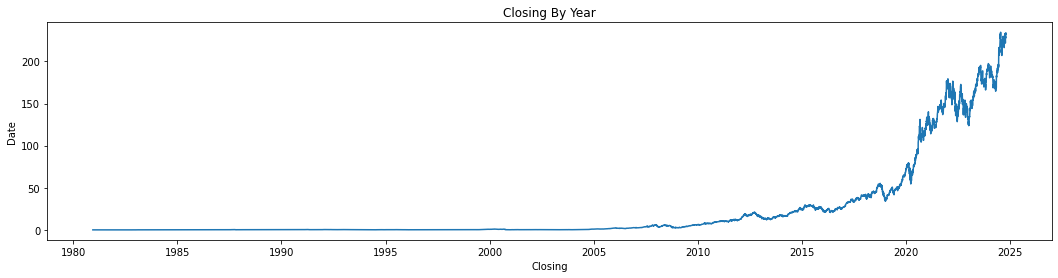

In [11]:
plt.figure(figsize=(18,4))
plt.title("Closing By Year")
plt.xlabel('Closing')
plt.ylabel('Date')
plt.plot(apple['close'])
plt.show()

# Train-Test Split the data

In [6]:
from sklearn.model_selection import train_test_split
features = ['open','high','low','volume']
x = apple[features]
y = apple['close']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,shuffle=False)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(8842, 4)
(2211, 4)
(8842,)
(2211,)


# Machine Learning on Apple dataset

## 1) Linear Regression


**Linear Regression** is a fundamental statistical method used to model the relationship between a dependent variable (often called the target or response variable) and one or more independent variables (also known as predictors or features). The main objective is to find the best-fitting linear relationship that can predict the dependent variable based on the independent variables.

### Simple Linear Regression

In its simplest form, **Simple Linear Regression** involves a single independent variable and is represented by the following equation:

$$
y = \beta_0 + \beta_1 x + \epsilon
$$

Where:
- $y$ = dependent variable (response)
- $x$ = independent variable (predictor)
- $\beta_0$ = y-intercept (the predicted value of $y$ when $x = 0$)
- $\beta_1$ = slope of the line (the change in $y$ for a one-unit change in $x$)
- $\epsilon$ = error term (captures the variation in $y$ not explained by the linear relationship)

### Multiple Linear Regression

In cases where there are multiple independent variables, the formula extends to:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon
$$

Where:
- $y$ = dependent variable
- $x_1, x_2, \ldots, x_n$ = independent variables
- $\beta_0$ = y-intercept
- $\beta_1, \beta_2, \ldots, \beta_n$ = coefficients for each independent variable
- $\epsilon$ = error term

### Objective

The primary goal in linear regression is to minimize the difference between the observed values and the values predicted by the linear model. This is typically done using the **Ordinary Least Squares (OLS)** method, which minimizes the sum of the squared residuals (the differences between the observed and predicted values):

$$
\text{Minimize} \quad S = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:
- $S$ = sum of squared errors
- $y_i$ = observed values
- $\hat{y}_i$ = predicted values from the model

### Assumptions of Linear Regression

Linear regression relies on several key assumptions:
1. **Linearity**: The relationship between the independent and dependent variable is linear.
2. **Independence**: The residuals (errors) are independent.
3. **Homoscedasticity**: Constant variance of the residuals.
4. **Normality**: The residuals are normally distributed (especially important for inference).

### Applications

Linear regression is widely used in various fields such as economics, biology, engineering, and social sciences for:
- Predictive modeling
- Trend analysis
- Risk assessment
- Understanding relationships between variables


## Code 

In [13]:
from sklearn.linear_model import LinearRegression
modellr = LinearRegression()
modellr.fit(xtrain,ytrain)
ypred = modellr.predict(xtest)
from sklearn.metrics import r2_score
r2_0 = r2_score(ytest,ypred)
print(f"R2 Score of Linear Regression : {r2_0}")

R2 Score of Linear Regression : 0.9998629224782566


## Plotting ML actual and prediction

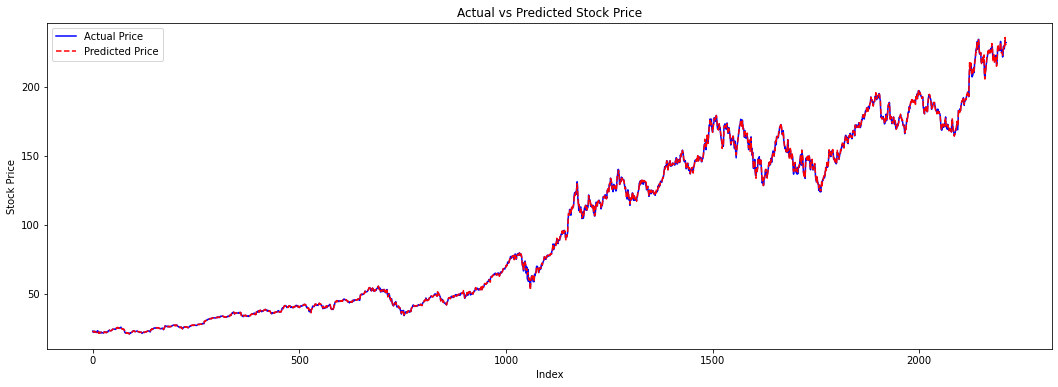

In [14]:
y_pred = np.squeeze(np.array(ypred))
y_test = np.array(ytest)
plt.figure(figsize=(18,6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Price', color='blue')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted Price', color='red', linestyle='--')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.show()

## 2) Ridge Regression

**Ridge Regression** is a type of linear regression that includes a regularization term in the loss function to prevent overfitting and improve model generalization. This technique is particularly useful when dealing with multicollinearity, where independent variables are highly correlated, leading to unstable estimates of coefficients.

### Mathematical Formulation

The Ridge Regression objective is to minimize the following loss function:

$$
L(\beta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

Where:
- $L(\beta)$ = loss function
- $y_i$ = observed values
- $\hat{y}_i = X \beta$ = predicted values from the linear model
- $X$ = matrix of input features
- $\beta$ = vector of coefficients
- $\lambda$ = regularization parameter (controls the strength of the penalty)
- $p$ = number of predictors

### Regularization Effect

The term $\lambda \sum_{j=1}^{p} \beta_j^2$ is known as the **L2 penalty**. It penalizes large coefficients, effectively shrinking them toward zero. This helps to reduce model complexity and multicollinearity, leading to more reliable predictions.

### Applications

Ridge Regression is commonly used in scenarios where:
- There are many predictors, some of which may be correlated.
- The goal is to enhance the model's predictive accuracy without significantly increasing the bias.


In [20]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(xtrain, ytrain)
ypred1 = ridge_reg.predict(xtest)

r2_1 = r2_score(ytest,ypred1)
print(f"R2 Score of Ridge Regression (L2 regularization) = {r2_1}")

R2 Score of Ridge Regression (L2 regularization) = 0.9998630076573156


## 3) Lasso Regression

### Lasso Regression

**Lasso Regression** (Least Absolute Shrinkage and Selection Operator) is a linear regression technique that incorporates a regularization term to prevent overfitting and enhance model interpretability. Unlike Ridge Regression, Lasso can reduce some coefficients to zero, effectively performing variable selection.

### Mathematical Formulation

The objective of Lasso Regression is to minimize the following cost function:

$$
J(\beta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

Where:
- $( J(\beta) )$ = cost function
- $( y_i )$ = observed value for the $( i^{th} $) observation
- $( \hat{y}_i )$ = predicted value for the $( i^{th} $) observation
- $( \beta_j )$ = coefficient for the $( j^{th} $) feature
- $( n )$ = number of observations
- $( p )$ = number of features
- $( \lambda )$ = regularization parameter (the lasso parameter)

### Key Features of Lasso Regression

1. **Regularization**: The term \( \lambda \sum_{j=1}^{p} |\beta_j| \) adds a penalty to the loss function, which discourages large coefficients and can lead to zeroing out less important features.

2. **Feature Selection**: By shrinking some coefficients to exactly zero, Lasso Regression can effectively select a simpler model that is easier to interpret and less prone to overfitting.

3. **Solution**: The coefficients can be estimated using optimization techniques, as there is no closed-form solution like that in Ridge Regression. Lasso regression typically uses coordinate descent or other iterative optimization algorithms.

### Applications

Lasso Regression is commonly used in:
- High-dimensional datasets where feature selection is desired
- Situations with many irrelevant features
- Scenarios requiring simpler and interpretable models

In summary, Lasso Regression offers a powerful approach to linear regression that not only minimizes prediction error but also simplifies the model by eliminating unnecessary predictors, making it particularly useful in many practical applications.


In [16]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(xtrain, ytrain)
ypred2 = lasso_reg.predict(xtest)
r2_2 = r2_score(ytest,ypred2)
print(f"R2 Score of Lasso Regression (L1 regularization) = {r2_2}")

R2 Score of Lasso Regression (L1 regularization) = 0.9993577928176817


## 4) Elastic Net Regression

### Elastic Net Regression

**Elastic Net Regression** is a linear regression technique that combines the penalties of both Lasso and Ridge regression methods. It is particularly useful when dealing with high-dimensional datasets where multicollinearity exists among the features and when the number of predictors is larger than the number of observations.

### Mathematical Formulation

The objective of Elastic Net Regression is to minimize the following cost function:

$$
J(\beta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda_1 \sum_{j=1}^{p} |\beta_j| + \lambda_2 \sum_{j=1}^{p} \beta_j^2
$$

Where:
- $( J(\beta) $) = cost function
- $( y_i $) = observed value for the $( i^{th} $) observation
- $( \hat{y}_i $) = predicted value for the $( i^{th} $) observation
- $( \beta_j $) = coefficient for the $( j^{th} $) feature
- $( n $) = number of observations
- $( p $) = number of features
- $( \lambda_1 $) = regularization parameter for Lasso (L1 penalty)
- $( \lambda_2 $) = regularization parameter for Ridge (L2 penalty)

### Key Features of Elastic Net Regression

1. **Combination of Penalties**: The cost function includes both L1 and L2 penalties, allowing Elastic Net to perform both variable selection (like Lasso) and regularization (like Ridge).

2. **Handling Multicollinearity**: Elastic Net is particularly effective when features are correlated, as it can select groups of correlated predictors


In [17]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(xtrain, ytrain)
ypred3 = elastic_net.predict(xtest)
r2_3 = r2_score(ytest,ypred3)
print(f"R2 Score of Elastic Net Regression = {r2_3}")

R2 Score of Elastic Net Regression = 0.9996487306800625


## ~~5) SVR~~

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(xtrain, ytrain)
ypred5 = svr.predict(xtest)
r2_5 = r2_score(ytest,ypred5)
print(f"R2 Score of Support Vector Regression (SVR) = {r2_5}")

*now we know that that main culprit is SVR which i have to run on 11000s rows of data !! from now i'm not using this.* 💀

## 6) KNN Regressor

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(xtrain,ytrain)
ypred9 = knn_reg.predict(xtest)
r2_9 = r2_score(ytest,ypred9)
print(f"R2 Score of KNN Regression = {r2_9}")

R2 Score of KNN Regression = -2.456828967829014


### we see that knn have negative R2 score 😓

# In Conclusion

## we have to use only these Regression model 

- Linear Regression
- Ridge Regression 
- Lasso Regression 
- Elastic Net Regression 
 
 ### which gives R2 Score :- 
 
 
 |Regression Model     | R2 Score         |
 |---------------------|------------------|
 |1) Linear Regression |0.9998629224782566|
 |2) Ridge regression  |0.9998630076573156|
 |3) Lasso Regression  |0.9993577928176817|
 |4) Elastic Regression|0.9996487306800625|

# Ensemble Model 

An ensemble model combines multiple machine learning models to produce a better prediction by leveraging the strengths of each individual model. The core idea is that different models may capture different aspects of the data, and combining them can reduce errors and improve performance. Ensemble methods are popular because they often yield higher accuracy and robustness than individual models.

### Voting Regressor

The Voting Regressor is a type of ensemble method specifically for regression tasks. In a Voting Regressor, several base regression models (e.g., Linear Regression, Decision Trees, Random Forest, etc.) are trained independently on the same data, and their predictions are combined to form the final output. There are two main ways to combine predictions in a Voting Regressor:

1. **Averaging (Simple or Mean)**: The final prediction is the average of the individual predictions.
2. **Weighted Averaging**: Each model’s prediction is weighted based on its importance or accuracy, and the final prediction is a weighted average.

### Why Use Voting Regressor in Regression?

1. **Improved Performance**: Voting Regressor combines the strengths of multiple models, often resulting in more accurate predictions by compensating for the weaknesses of individual models.

2. **Reduced Overfitting**: By blending predictions from different models, ensemble methods like Voting Regressor can generalize better to new data and reduce the risk of overfitting.

3. **Model Stability**: Voting makes the model less sensitive to specific biases or errors from individual models, especially when they have different characteristics (e.g., tree-based and linear models).

4. **Flexibility**: You can use a variety of base models, including linear and non-linear models, to handle complex data more effectively.

In summary, using a Voting Regressor allows us to harness the combined power of different models, leading to more accurate, stable, and robust predictions in regression tasks.

In [9]:
# loading all model once again 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
#Making model 
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

#loading voting regressor modules 
from sklearn.ensemble import VotingRegressor

#creating voting ensemble model 
votingmodel = VotingRegressor([
    ('lr',linear_reg),
    ('rr',ridge_reg),
    ('lar',lasso_reg),
    ('enr',elastic_net)
])

#train voting model 
votingmodel.fit(xtrain,ytrain)

yprediction = votingmodel.predict(xtest)

R2_score = r2_score(ytest,yprediction)
print(f"R2 Score of a voting model :{R2_score}")

R2 Score of a voting model :0.9997769554424071


### As We see ensemble model gives R2 Score of *0.9997769* which is good for regression 

# Plotting voting regressor on testing data 

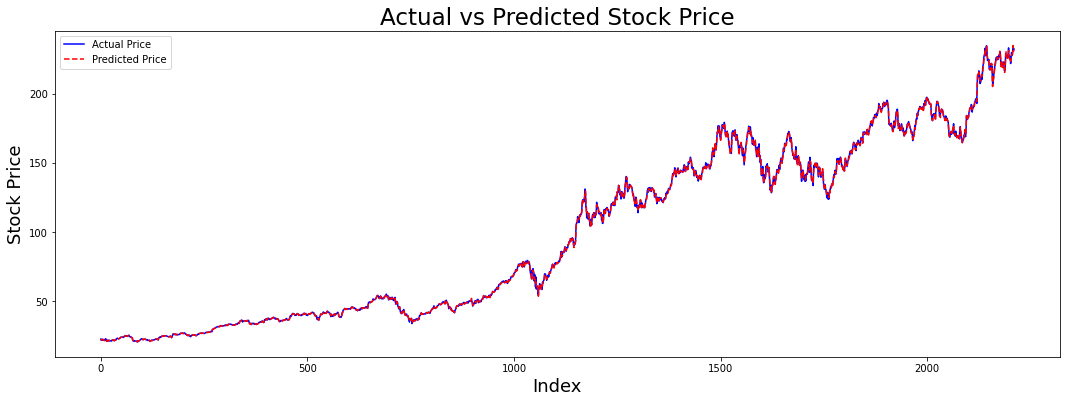

In [14]:
# Assuming y_test is a pandas Series, y_pred is a numpy array or multi-dimensional structure
import matplotlib.pyplot as plt
# Convert y_pred to a 1D numpy array (if it's not already)
y_pred = np.squeeze(np.array(yprediction))  # Flatten if it's multi-dimensional

# Ensure y_test is aligned (if y_test is a pandas Series)
y_test = np.array(ytest)  # You can convert it to a numpy array if needed
plt.figure(figsize=(18,6))
# Plot the actual vs predicted values
plt.plot(np.arange(len(ytest)), ytest, label='Actual Price', color='blue')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted Price', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Index',fontsize=18)
plt.ylabel('Stock Price',fontsize=18)
plt.title('Actual vs Predicted Stock Price',fontsize=23)
plt.legend()

# Display the plot
plt.show()

# Save Model with pickle 

In [21]:
import pickle
# Specify the filename
filename = "D:/7th semester/Mini Project/Project number 2/Models/Apple_ensemble_model.pkl"

# Open the file in write-binary mode and save the model
with open(filename, 'wb') as file:
    pickle.dump(votingmodel, file)
    
# Load the model
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# You can now use loaded_model to make predictions
predictions = loaded_model.predict(xtest)
predictions

array([ 22.91519593,  22.28783912,  22.19241586, ..., 234.7556048 ,
       230.65046901, 231.91252223])

In [23]:
#r2 score 
r2scoree = r2_score(ytest,predictions)
print(f"R2 Score of pickle ensemble model : {r2scoree}")

R2 Score of pickle ensemble model : 0.9997769554424071


# Save Model with joblib

In [25]:
import joblib

# Save the model to a file
joblib.dump(votingmodel, 'D:/7th semester/Mini Project/Project number 2/Models/Apple_ensemble_model.joblib')
# Load the model from the file
loaded_model = joblib.load('D:/7th semester/Mini Project/Project number 2/Models/Apple_ensemble_model.joblib')

# Now you can use loaded_model to make predictions
predictions = loaded_model.predict(xtest)
predictions

array([ 22.91519593,  22.28783912,  22.19241586, ..., 234.7556048 ,
       230.65046901, 231.91252223])

# Testing on random data 

In [15]:
apple.tail(3)

,open,high,low,close,volume
date,,,,,
2024-10-15,233.61,237.49,232.37,233.85,62157159
2024-10-16,231.60,232.12,229.84,231.78,33782884
2024-10-17,233.43,233.85,230.52,232.15,32290873


In [16]:
import pickle 
filename = "Models/Apple_ensemble_model.pkl"
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)
    
sample = np.array([233.61, 237.49, 232.37, 62157159])

sample_reshaped = pd.DataFrame([sample], columns=['open','high','low','volume'])

#prediction = loaded_model.predict(sample_reshaped)
prediction = loaded_model.predict(sample_reshaped)
print(prediction[0])


234.7556047976181


---
*Note: This document provides a brief overview of key concepts in regression techniques, including Ridge, Lasso, and Elastic Net. For a deeper understanding, consult additional resources or textbooks on machine learning and statistics.*

- [^1]: All formulas were formatted in LaTeX to ensure clarity and readability.
- [^2]: References to tuning and optimization methods are based on common practices in scikit-learn and related Python libraries.

---

---

*End of Document*  

---

- [^1]: Created by **Geetanshu Dev Meshram** 🧑🏻‍💻, *2/october/2024*.  
- [^2]: Sources and methodologies inspired by "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow."
